# Importing all the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing train and test data

In [3]:
# import data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Concatinating train and test for performing PreProcessing

In [4]:
# Concatenate train and test data
concatenated_data = pd.concat([train, test], axis=0)

# Reset the index of the concatenated data
concatenated_data.reset_index(drop=True, inplace=True)

# Saving the concatenated data to a new CSV file
concatenated_data.to_csv('concatenated_data.csv', index=False)

# Converting Label Satisfaction equal to 1 and dissatisfied to 0

In [5]:
df = pd.read_csv("concatenated_data.csv")
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df['satisfaction'] = pd.to_numeric(df['satisfaction'], errors='coerce')

In [6]:
display(df.sample(n=7))

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
22440,22440,109356,Male,Loyal Customer,54,Business travel,Business,1544,5,5,...,4,4,4,4,4,4,5,36,19.0,1
73582,73582,113944,Female,Loyal Customer,41,Business travel,Business,1838,4,2,...,4,4,4,4,1,4,3,0,23.0,0
36031,36031,75278,Male,Loyal Customer,17,Personal Travel,Eco,1744,3,0,...,5,3,2,5,4,5,5,3,0.0,0
88528,88528,76873,Male,Loyal Customer,46,Business travel,Business,1794,5,5,...,4,4,4,4,5,4,3,2,0.0,1
27569,27569,33429,Female,Loyal Customer,12,Business travel,Business,2399,4,5,...,4,3,5,4,2,4,4,0,0.0,0
75759,75759,58949,Female,Loyal Customer,67,Personal Travel,Eco Plus,888,3,4,...,5,5,3,5,4,5,5,8,2.0,0
66932,66932,27456,Female,disloyal Customer,30,Business travel,Eco,671,3,3,...,4,2,1,3,3,3,4,0,0.0,0


In [7]:
# Drop the 'Unnamed: 0' and 'id' columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

None

In [9]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,129880,2,Female,65899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,129880,2,Loyal Customer,106100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,129880.0,NaN,NaN,NaN,39.427957,15.11936,7.0,27.0,40.0,51.0,85.0
Type of Travel,129880,2,Business travel,89693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,129880,3,Business,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,129880.0,NaN,NaN,NaN,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,NaN,NaN,NaN,2.728696,1.32934,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,NaN,NaN,NaN,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,NaN,NaN,NaN,2.756876,1.40174,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,NaN,NaN,NaN,2.976925,1.27852,0.0,2.0,3.0,4.0,5.0


# Extracting categorical and numerical columns


In [10]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [11]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Gender has ['Male' 'Female'] values

Customer Type has ['Loyal Customer' 'disloyal Customer'] values

Type of Travel has ['Personal Travel' 'Business travel'] values

Class has ['Eco Plus' 'Business' 'Eco'] values



# Performing Hot endcoding 

In [12]:
# Select the columns for one-hot encoding
columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel']

# Perform one-hot encoding on the selected columns
encoded_data = pd.get_dummies(df[columns_to_encode])

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df.drop(columns=columns_to_encode), encoded_data], axis=1)


### There is an inherent order or hierarchy among the 'Class' categories and I believe that the level of satisfaction might vary based on the service quality associated with each class (i.e., 'Business' class offering better service than 'Eco'), then label encoding would be a reasonable choice for predicting satisfaction.

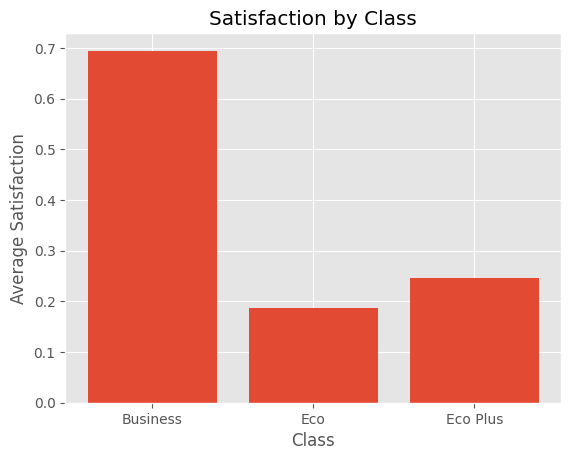

In [13]:
class_satisfaction = df.groupby('Class')['satisfaction'].mean()

plt.style.use('ggplot')
# Plot the graph
plt.bar(class_satisfaction.index, class_satisfaction.values)
plt.xlabel('Class')
plt.ylabel('Average Satisfaction')
plt.title('Satisfaction by Class')
plt.show()

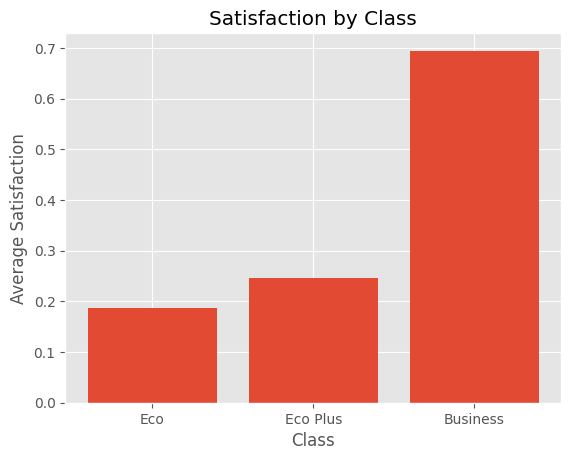

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to map class labels to numeric values
class_mapping = {'Business': 3, 'Eco': 1, 'Eco Plus': 2}

# Apply label encoding to the 'Class' column
df['Class_Encoded'] = df['Class'].map(class_mapping)
#df.drop('class', axis=1, inplace=True)


# Convert 'Class_Encoded' column to float
df['Class_Encoded'] = df['Class_Encoded'].astype(float)

# Calculate average satisfaction scores for each class
avg_satisfaction = df.groupby('Class_Encoded')['satisfaction'].mean()

# Get the class labels in the original order
class_labels = [class_label for class_label, _ in sorted(class_mapping.items(), key=lambda x: x[1])]

# Plot the graph
plt.bar(class_labels, avg_satisfaction)
plt.xlabel('Class')
plt.ylabel('Average Satisfaction')
plt.title('Satisfaction by Class')
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  int64  
 1   Class                              129880 non-null  object 
 2   Flight Distance                    129880 non-null  int64  
 3   Inflight wifi service              129880 non-null  int64  
 4   Departure/Arrival time convenient  129880 non-null  int64  
 5   Ease of Online booking             129880 non-null  int64  
 6   Gate location                      129880 non-null  int64  
 7   Food and drink                     129880 non-null  int64  
 8   Online boarding                    129880 non-null  int64  
 9   Seat comfort                       129880 non-null  int64  
 10  Inflight entertainment             129880 non-null  int64  
 11  On-board service                   1298

In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,129880.0,NaN,NaN,NaN,39.427957,15.11936,7.0,27.0,40.0,51.0,85.0
Class,129880,3,Business,62160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,129880.0,NaN,NaN,NaN,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,NaN,NaN,NaN,2.728696,1.32934,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,NaN,NaN,NaN,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,NaN,NaN,NaN,2.756876,1.40174,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,NaN,NaN,NaN,2.976925,1.27852,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,NaN,NaN,NaN,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,NaN,NaN,NaN,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,NaN,NaN,NaN,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0


In [17]:
df.sample(n=15)

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Encoded
129664,38,Business,1532,3,3,3,3,3,5,4,...,0,0.0,1,0,1,1,0,1,0,3.0
89844,31,Business,594,1,1,1,1,5,5,5,...,7,8.0,1,1,0,1,0,1,0,3.0
105411,39,Eco Plus,460,4,3,3,3,4,4,4,...,0,0.0,1,1,0,1,0,1,0,2.0
32541,39,Business,580,5,5,5,5,3,3,3,...,144,123.0,1,1,0,1,0,1,0,3.0
95713,47,Eco,918,1,3,3,3,1,1,1,...,0,0.0,0,0,1,1,0,1,0,1.0
11453,40,Eco,1011,3,3,3,3,3,3,3,...,0,0.0,0,1,0,1,0,1,0,1.0
48915,32,Eco,2176,1,3,1,3,2,1,2,...,0,0.0,0,1,0,1,0,0,1,1.0
14462,27,Business,2000,4,4,4,4,3,5,3,...,5,4.0,1,0,1,1,0,1,0,3.0
18089,42,Eco,610,3,4,3,2,1,3,4,...,0,0.0,0,1,0,1,0,0,1,1.0
52310,51,Business,305,1,1,4,1,4,3,5,...,3,0.0,1,0,1,1,0,1,0,3.0


### Checking Age group Satisfication 

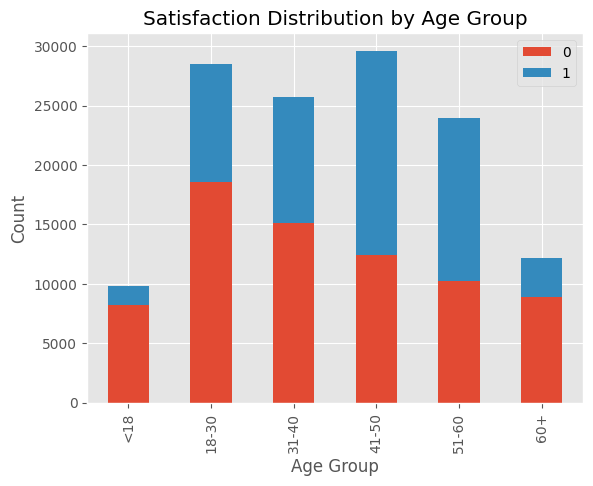

In [18]:
bins = [0, 18, 30, 40, 50, 60, 100]

# Create labels for the age groups
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '60+']
new = pd.DataFrame()
new['satisfaction'] = df['satisfaction']
# Perform age binning
new['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

grouped_df = new.groupby(['Age_Group', 'satisfaction']).size().unstack()

# Plot the graph
grouped_df.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Satisfaction Distribution by Age Group')
plt.legend(loc='upper right')
plt.show()

# Dealing with Departure delay and Arrival Delay

In [19]:
#round departure delay to hours
df["Departure Delay in hour"]= round(df["Departure Delay in Minutes"]/60,1)
# update null values to 0 
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
#round arrival delay to hours
df["Arrival Delay in hour"]= round(df["Arrival Delay in Minutes"]/60,1)

<AxesSubplot: xlabel='satisfaction', ylabel='count'>

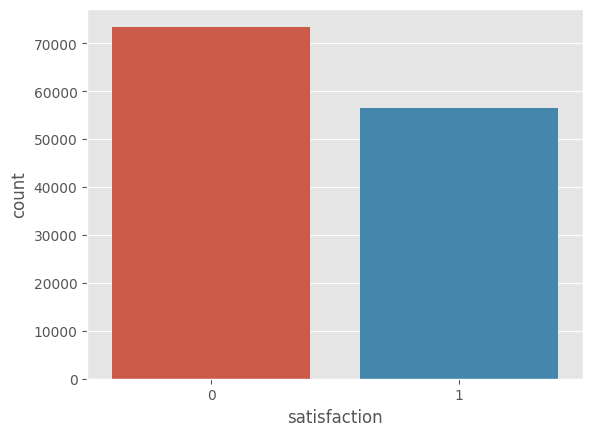

In [20]:
sns.countplot(x='satisfaction',data=df)

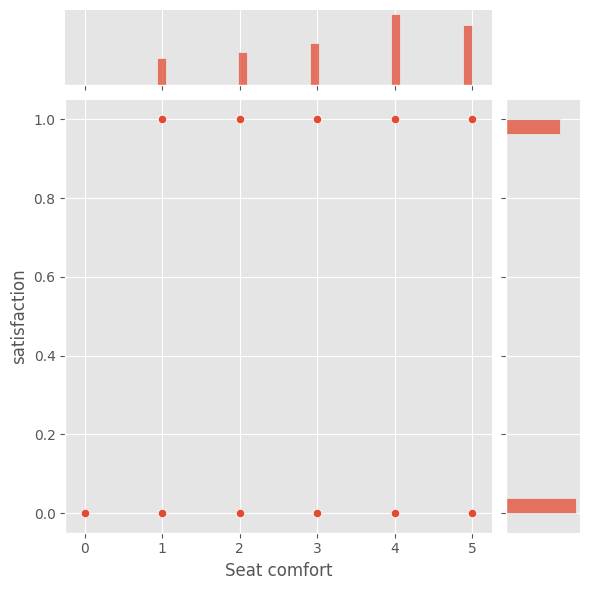

In [21]:
sns.jointplot(x='Seat comfort',y='satisfaction',data=df)

# Standard Scaling  

In [22]:
from sklearn.preprocessing import StandardScaler
import pickle
scaler = StandardScaler()

df.drop('Class', axis=1, inplace=True)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_scaled = scaler.fit_transform(X)

# Create a DataFrame using the scaled features (X_scaled)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the 'satisfaction' column back to the new DataFrame (df1)
df_scaled['satisfaction'] = y

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  int64  
 1   Flight Distance                    129880 non-null  int64  
 2   Inflight wifi service              129880 non-null  int64  
 3   Departure/Arrival time convenient  129880 non-null  int64  
 4   Ease of Online booking             129880 non-null  int64  
 5   Gate location                      129880 non-null  int64  
 6   Food and drink                     129880 non-null  int64  
 7   Online boarding                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Inflight entertainment             129880 non-null  int64  
 10  On-board service                   129880 non-null  int64  
 11  Leg room service                   1298

# Analysing Correlation among Feature and label

<AxesSubplot: >

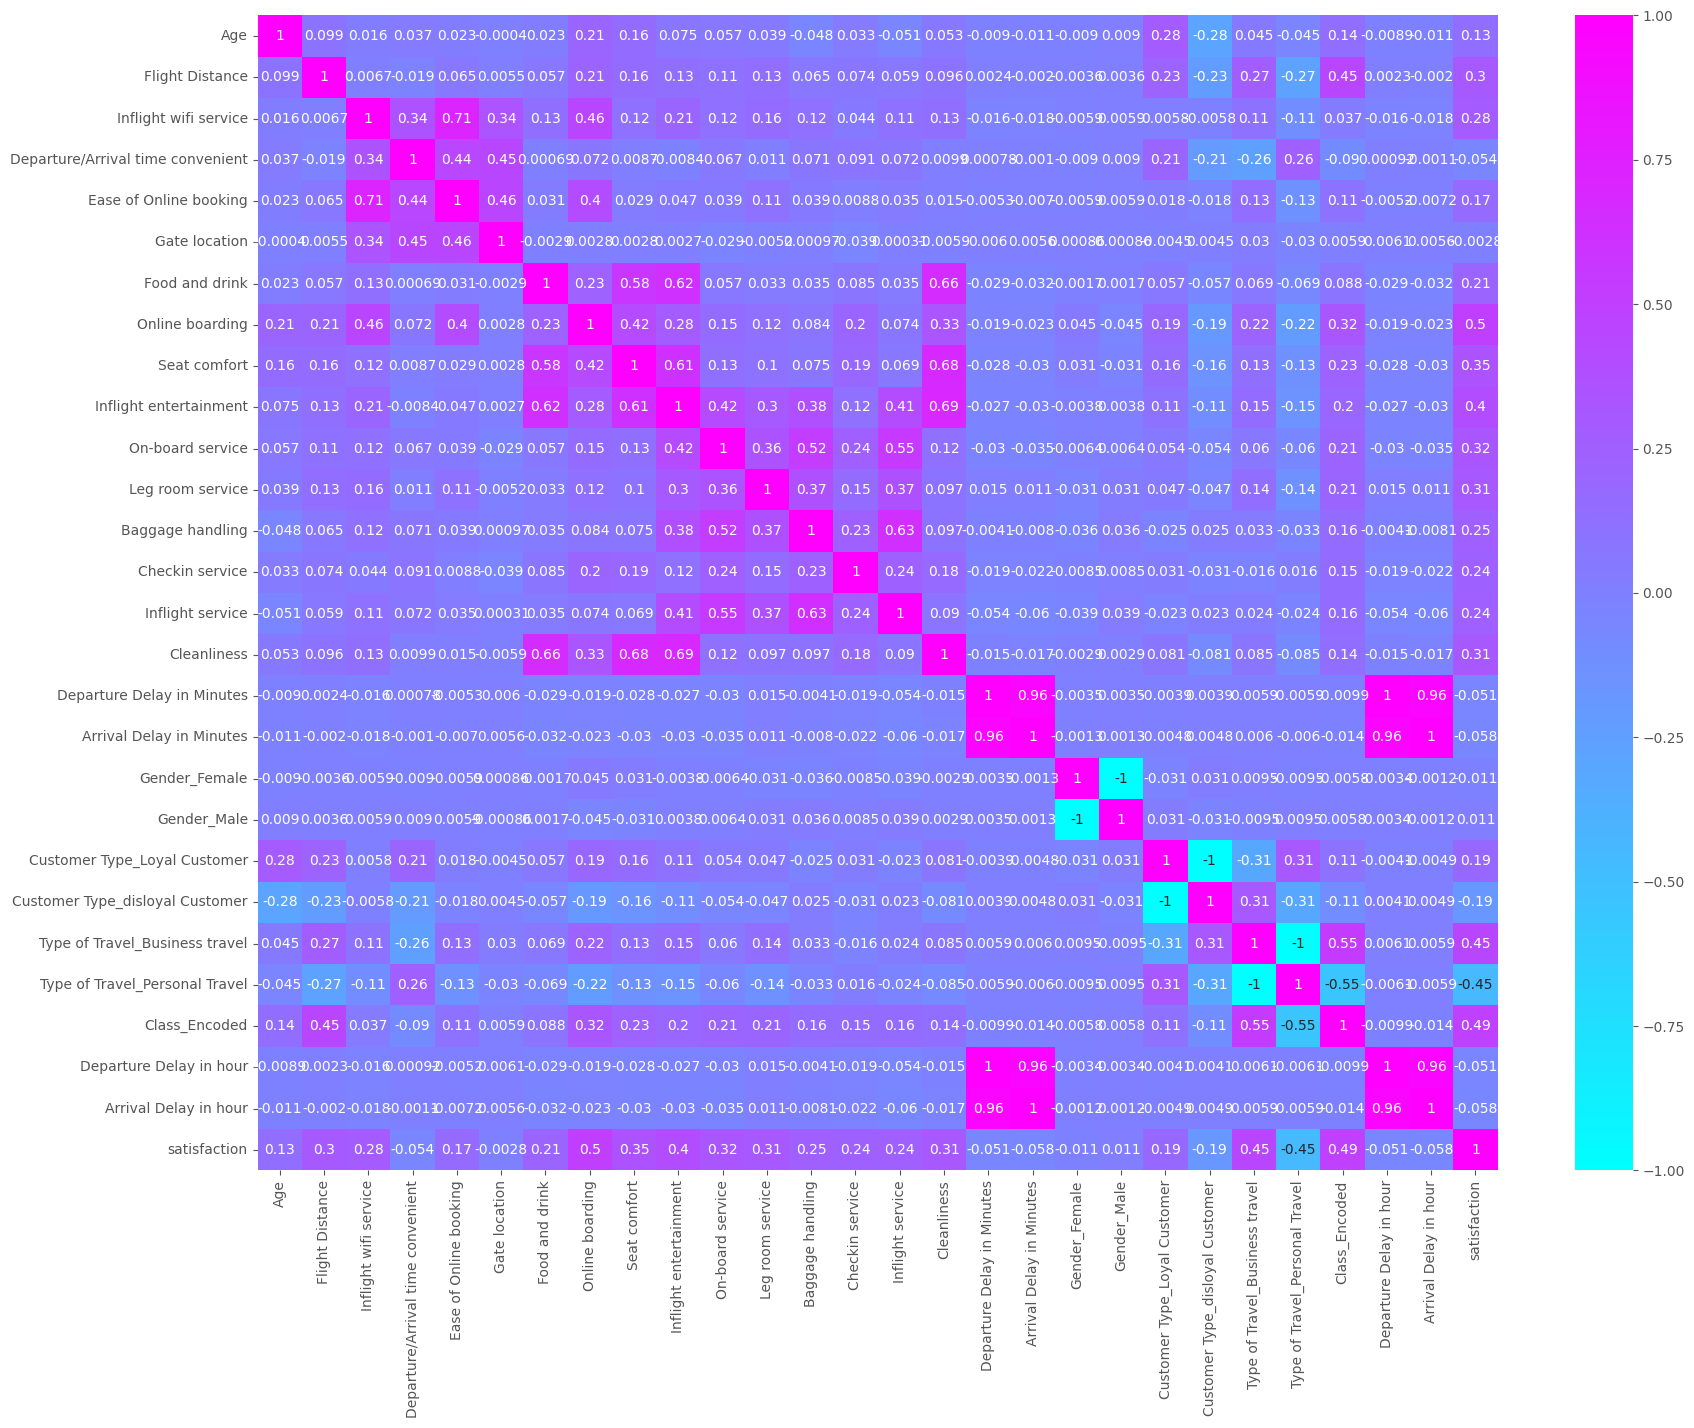

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df_scaled.corr(),cmap='cool',annot=True)

Gender has ['Male' 'Female'] values

Customer Type has ['Loyal Customer' 'disloyal Customer'] values

Type of Travel has ['Personal Travel' 'Business travel'] values

Class has ['Eco Plus' 'Business' 'Eco'] values

In [24]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  float64
 1   Flight Distance                    129880 non-null  float64
 2   Inflight wifi service              129880 non-null  float64
 3   Departure/Arrival time convenient  129880 non-null  float64
 4   Ease of Online booking             129880 non-null  float64
 5   Gate location                      129880 non-null  float64
 6   Food and drink                     129880 non-null  float64
 7   Online boarding                    129880 non-null  float64
 8   Seat comfort                       129880 non-null  float64
 9   Inflight entertainment             129880 non-null  float64
 10  On-board service                   129880 non-null  float64
 11  Leg room service                   1298

# **Selecting Features**

### Calculate feature importance using decision tree-based models like Random Forest or Gradient Boosting Machines (GBM) 

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler

model = RandomForestClassifier()

# Separate the target variable (e.g., 'satisfaction') from the features
x = df_scaled.drop('satisfaction', axis=1)
y = df_scaled['satisfaction']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size = .33, random_state = 360)
model.fit(X_train,y_train)

importances = model.feature_importances_

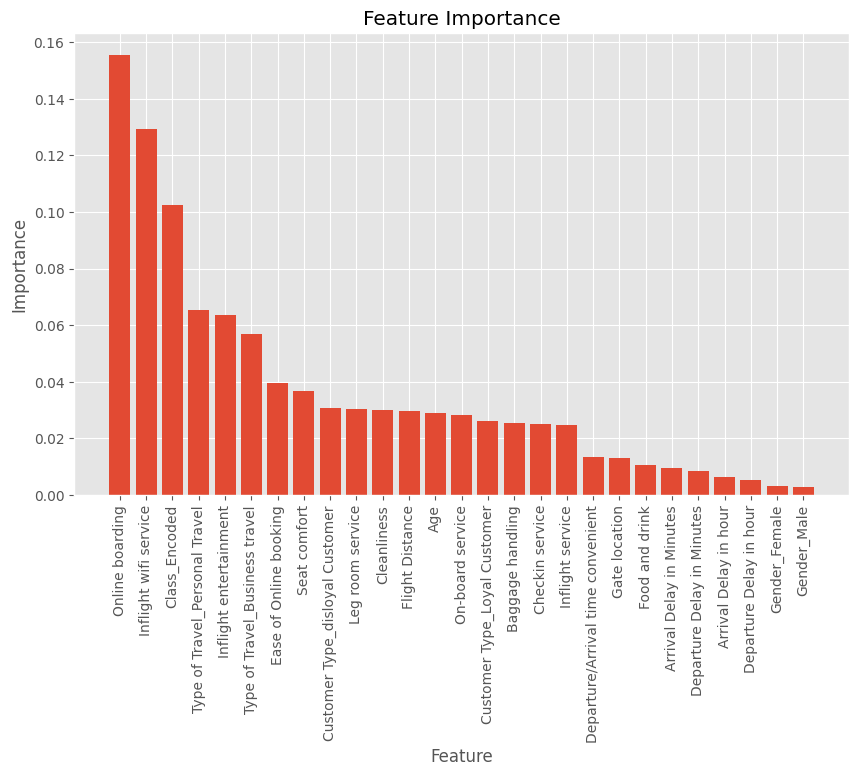

In [26]:
# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Get the feature names
feature_names = np.array(X_train.columns)
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [27]:
# Get the feature names
feature_names = np.array(X_train.columns)

# Create a list of features with importances
feature_importances = list(zip(feature_names, importances))

# Sort the list by importances in descending order
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
"""for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")"""
# Set the threshold value
threshold = 0.03

# Get the indices of features with importances above the threshold
selected_indices = np.where(importances > threshold)[0]
selected_features = feature_names[selected_indices]

# Print the selected features
for feature in selected_features:
    print(feature)
rf_feature = []
for i in feature:
    rf_feature.append(i)


# Alternatively, you can create a new dataframe from scratch using only the selected features
rf_df = pd.DataFrame()
for feature in selected_features:
    rf_df[feature] = df[feature].copy()


Inflight wifi service
Ease of Online booking
Online boarding
Seat comfort
Inflight entertainment
Leg room service
Customer Type_disloyal Customer
Type of Travel_Business travel
Type of Travel_Personal Travel
Class_Encoded


### Feature Selection based on Correlation 

In [28]:
from sklearn.preprocessing import StandardScaler
import pickle
scaler1 = StandardScaler()

rf_df_scaled_values = scaler1.fit_transform(rf_df)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler1, scaler_file)
    
rf_df = pd.DataFrame(rf_df_scaled_values, columns=rf_df.columns)
rf_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Inflight wifi service            129880 non-null  float64
 1   Ease of Online booking           129880 non-null  float64
 2   Online boarding                  129880 non-null  float64
 3   Seat comfort                     129880 non-null  float64
 4   Inflight entertainment           129880 non-null  float64
 5   Leg room service                 129880 non-null  float64
 6   Customer Type_disloyal Customer  129880 non-null  float64
 7   Type of Travel_Business travel   129880 non-null  float64
 8   Type of Travel_Personal Travel   129880 non-null  float64
 9   Class_Encoded                    129880 non-null  float64
dtypes: float64(10)
memory usage: 9.9 MB


In [29]:
# Separate the dependent variable from the dataset
target_variable = df['satisfaction']
df_independent = df.drop('satisfaction', axis=1)

# Calculate the correlation matrix for X by X
correlation_matrix_x = df_independent.corr()

# Calculate the correlation between each independent variable and the dependent variable (X by Y)
correlation_with_y = df_independent.corrwith(target_variable)

# Set the threshold for correlation coefficient
threshold_x = 0.3
threshold_y = 0.3

# Select features with correlation coefficient above the threshold (X by X)
selected_features_x = correlation_matrix_x[abs(correlation_matrix_x) > threshold_x].dropna(axis=0, how='all').dropna(axis=1, how='all')

# Select features with correlation coefficient above the threshold (X by Y)
selected_features_y = correlation_with_y[abs(correlation_with_y) > threshold_y]

# Combine the selected features from X by X and X by Y correlations
final_features = selected_features_x.columns.intersection(selected_features_y.index)

# Print the selected features
print("Selected Features:")
print(final_features)

cr_df = df[selected_features].copy()

# Alternatively, create a new dataframe from  selected features
cr_df = pd.DataFrame()
for feature in final_features:
    cr_df[feature] = df[feature].copy()



Selected Features:
Index(['Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Encoded'],
      dtype='object')


### Feature based on Random Forest  

In [30]:
rf_df.sample(n=7)

,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,Leg room service,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Encoded
34264,-1.300421,-1.253359,-1.667736,0.423441,0.481186,-0.266574,-0.473422,-1.493951,1.493951,-0.030801
92921,-0.548166,-0.539957,-0.927386,1.181428,0.481186,-1.026310,-0.473422,-1.493951,1.493951,-1.069619
40854,0.204090,0.173445,0.553313,1.181428,-1.018015,-0.266574,-0.473422,0.669366,-0.669366,1.008016
94731,-0.548166,0.173445,-0.187037,0.423441,0.481186,-0.266574,-0.473422,-1.493951,1.493951,-1.069619
46162,-0.548166,0.886847,-0.927386,-1.092533,-1.018015,-1.026310,-0.473422,0.669366,-0.669366,-1.069619
87064,0.204090,-0.539957,-0.187037,-0.334546,-0.268414,-1.786046,-0.473422,0.669366,-0.669366,-1.069619
89514,0.956346,-0.539957,0.553313,0.423441,0.481186,1.252898,-0.473422,0.669366,-0.669366,-1.069619


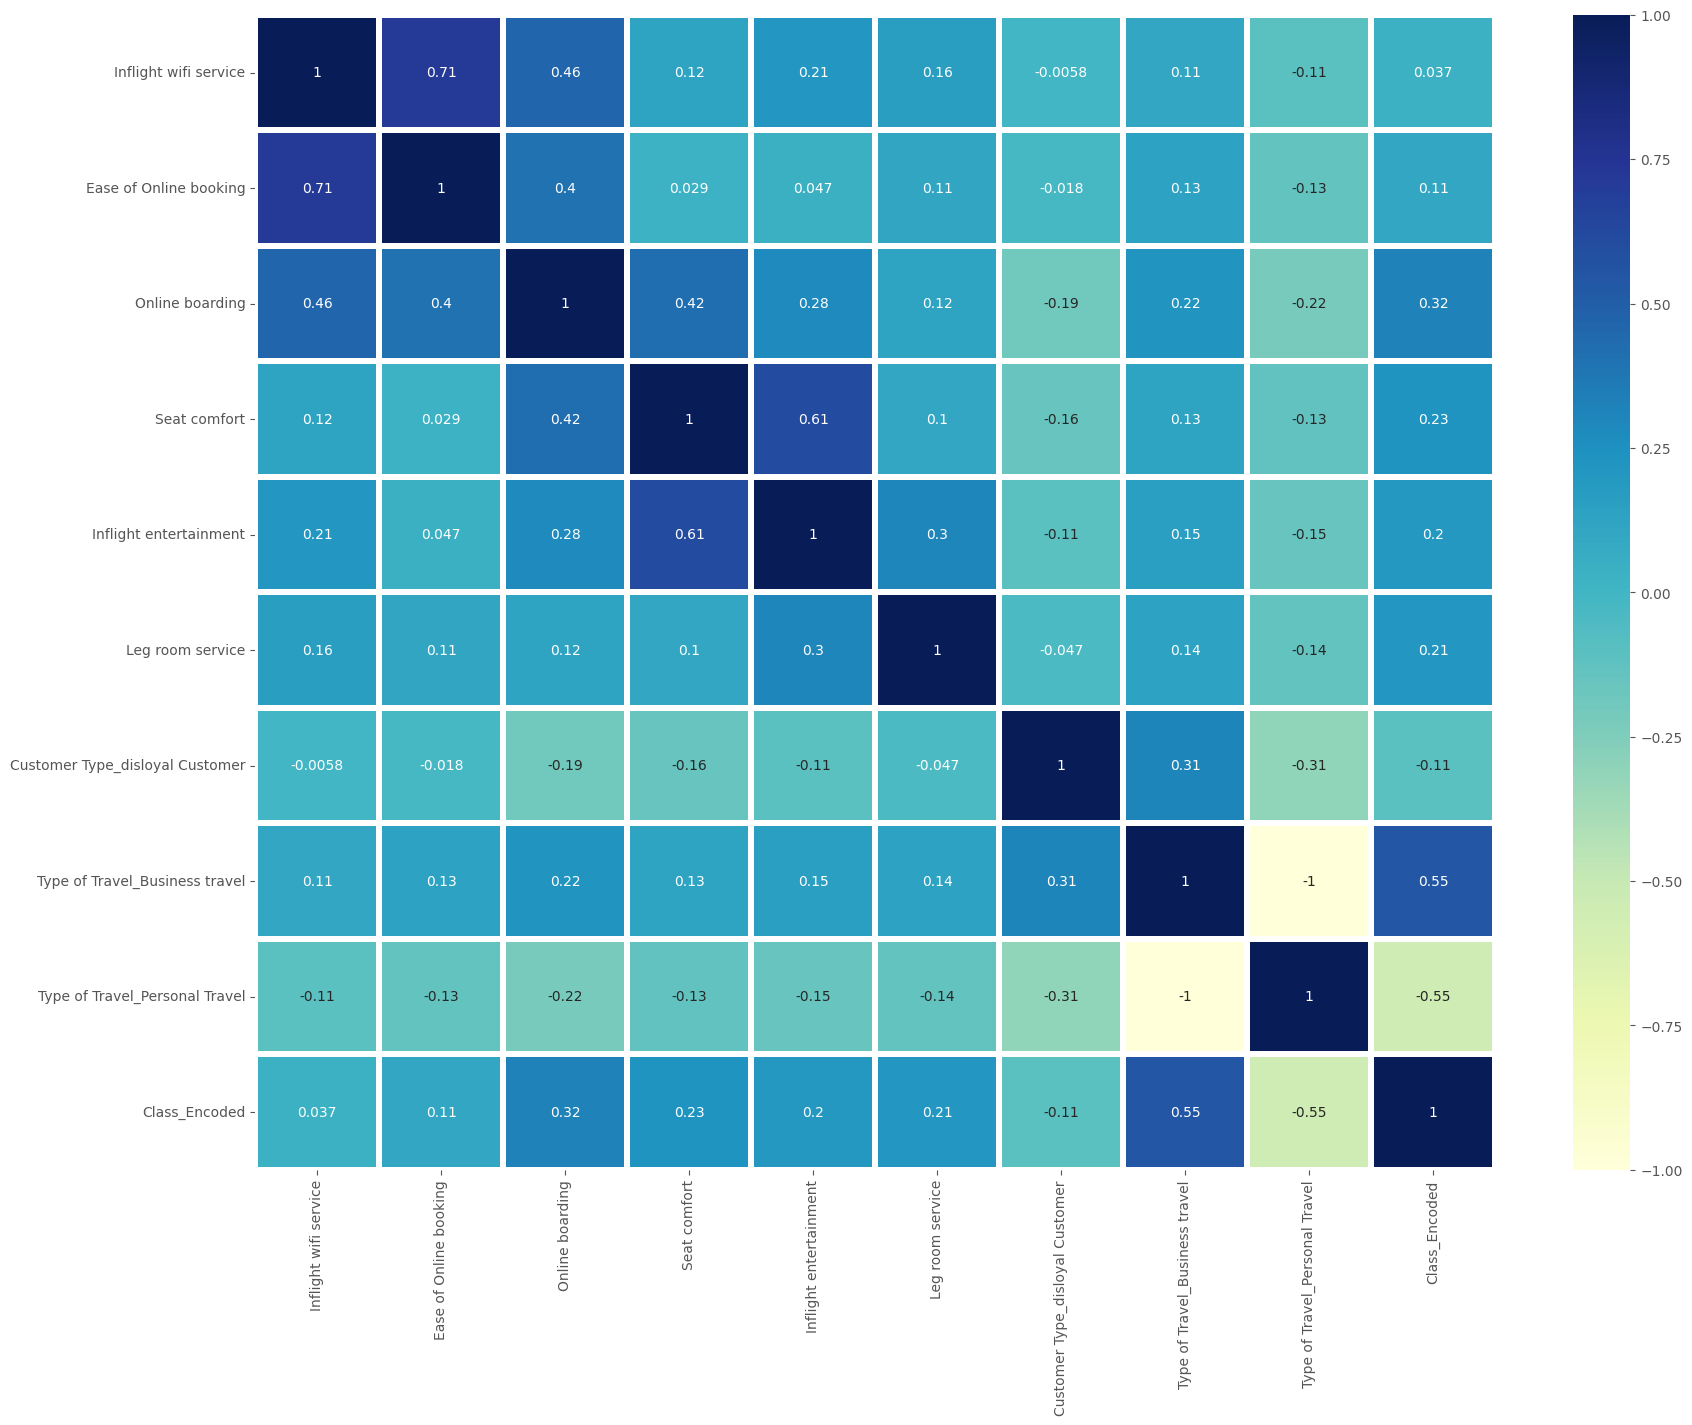

In [31]:
# heatmap of data
plt.figure(figsize = (20,15))
sns.heatmap(rf_df.corr(), annot = True, linewidths = 4, cmap="YlGnBu")
plt.show()

In [32]:
cr_df.sample(n=7)

,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Cleanliness,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Encoded
119791,2,1,2,3,1,2,1,0,2.0
44023,0,1,5,5,5,5,1,0,1.0
91223,2,2,3,3,3,1,1,0,3.0
4105,2,2,2,1,3,2,0,1,1.0
67769,5,5,5,5,1,5,1,0,2.0
114006,3,4,2,2,2,3,1,0,3.0
126598,5,5,3,3,3,3,1,0,3.0


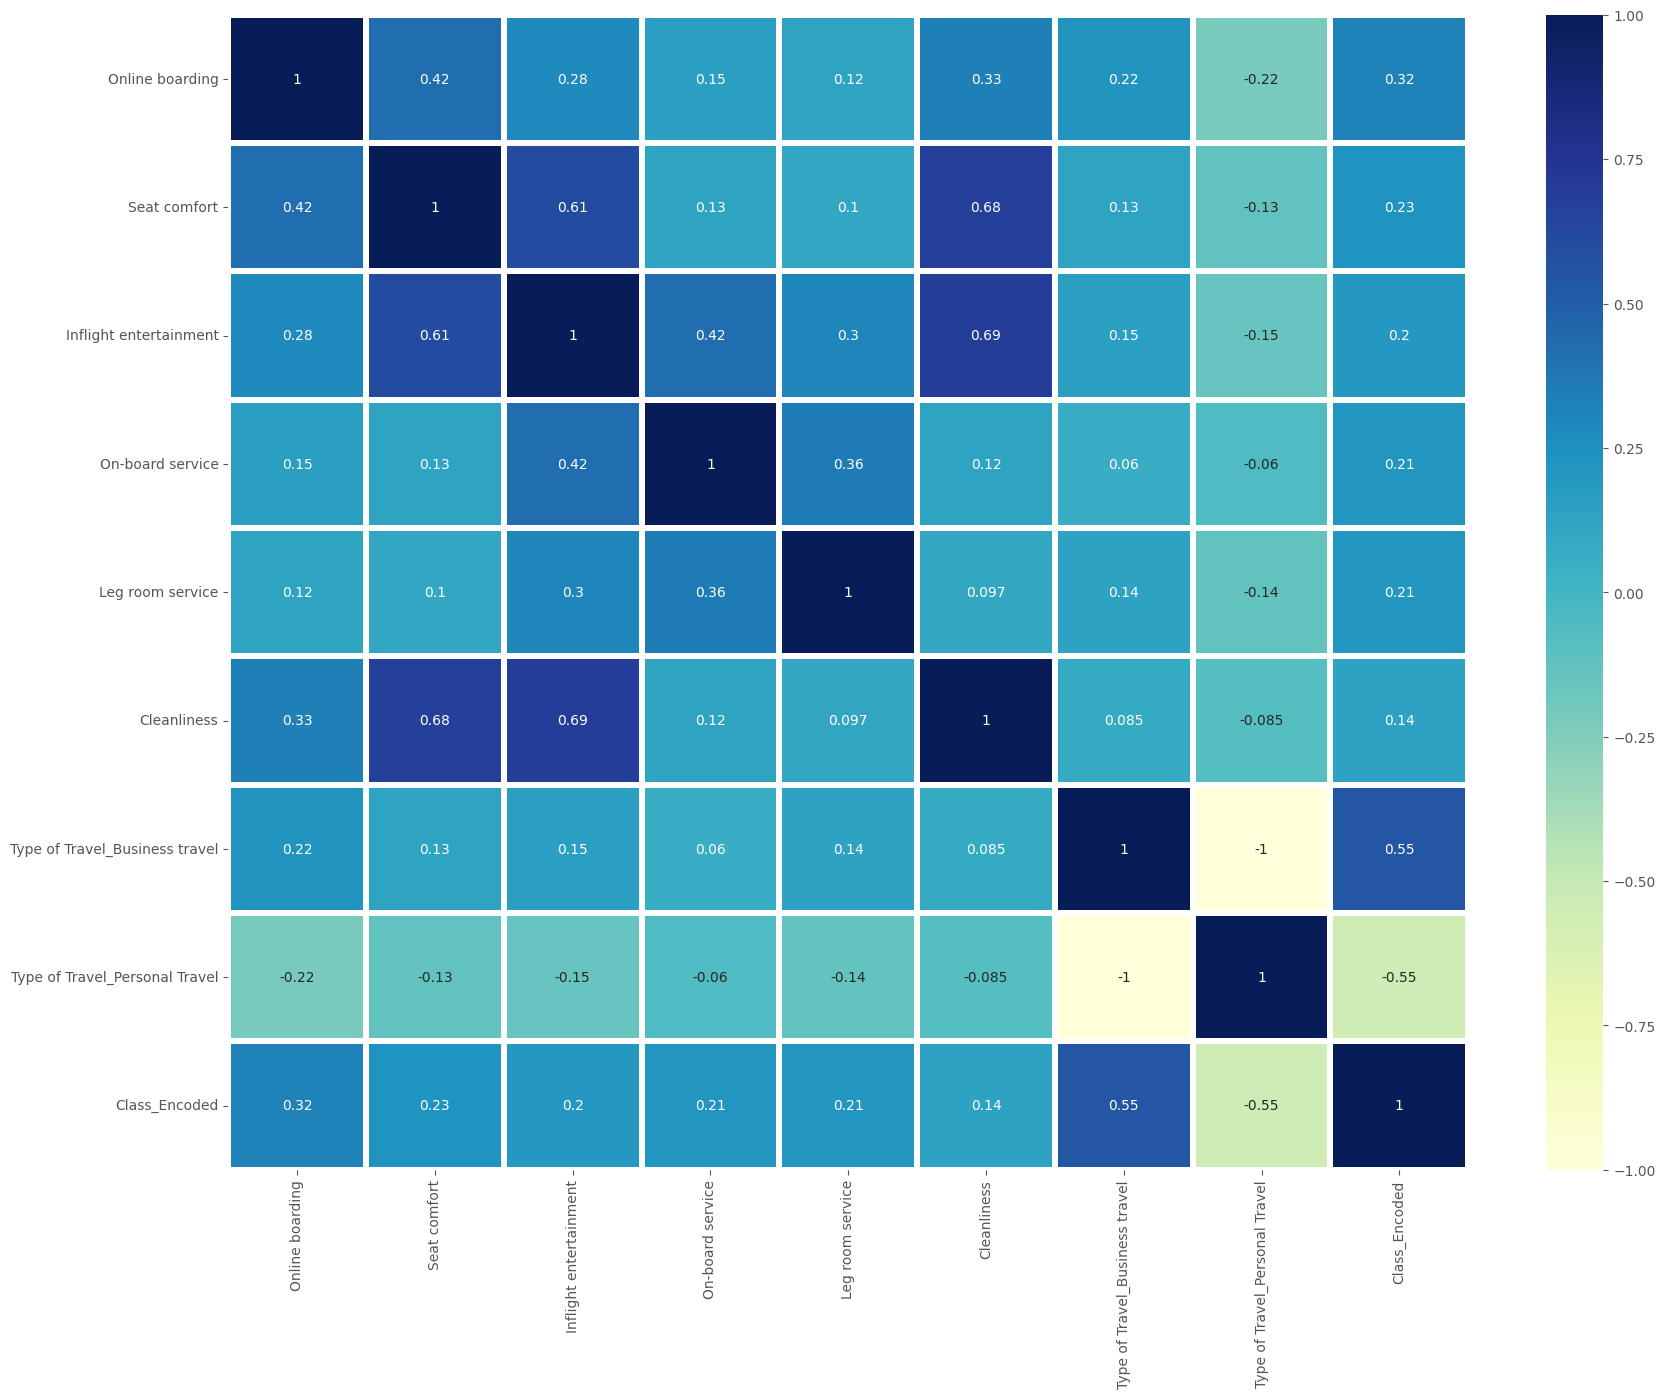

In [33]:
# heatmap of data
plt.figure(figsize = (20,15))
sns.heatmap(cr_df.corr(), annot = True, linewidths = 4, cmap="YlGnBu")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
Y = df['satisfaction']
rf_df

,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,Leg room service,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Encoded
0,0.204090,0.173445,-0.187037,1.181428,1.230787,-0.266574,-0.473422,-1.493951,1.493951,-0.030801
1,0.204090,0.173445,-0.187037,-1.850520,-1.767616,1.252898,2.112281,0.669366,-0.669366,1.008016
2,-0.548166,-0.539957,1.293662,1.181428,1.230787,-0.266574,-0.473422,0.669366,-0.669366,1.008016
3,-0.548166,1.600249,-0.927386,-1.092533,-1.018015,1.252898,-0.473422,0.669366,-0.669366,1.008016
4,0.204090,0.173445,1.293662,1.181428,-0.268414,0.493162,-0.473422,0.669366,-0.669366,1.008016
...,...,...,...,...,...,...,...,...,...,...
129875,0.204090,0.173445,-0.187037,0.423441,0.481186,-1.026310,2.112281,0.669366,-0.669366,1.008016
129876,0.956346,0.886847,0.553313,0.423441,0.481186,1.252898,-0.473422,0.669366,-0.669366,1.008016
129877,-0.548166,-1.253359,-1.667736,-1.092533,-1.018015,-0.266574,-0.473422,-1.493951,1.493951,-1.069619
129878,0.204090,0.173445,0.553313,0.423441,0.481186,-1.026310,-0.473422,0.669366,-0.669366,1.008016


In [35]:
rfX_train,rfX_test, rfy_train, rfy_test = train_test_split(rf_df, Y, test_size = .33, random_state = 360)
crX_train,crX_test, cry_train, cry_test = train_test_split(cr_df, Y, test_size = .33, random_state = 360)

In [36]:
rfX_train.describe()

,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,Leg room service,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Encoded
count,87019.000000,87019.000000,87019.000000,87019.000000,87019.000000,87019.000000,87019.000000,87019.000000,87019.000000,87019.000000
mean,-0.001041,-0.000398,-0.002135,-0.003831,-0.002649,0.002898,-0.003164,-0.001837,0.001837,0.003054
std,1.000690,1.001273,1.002338,1.000792,1.000697,0.999576,0.997404,1.000761,1.000761,0.999686
min,-2.052677,-1.966761,-2.408085,-2.608507,-2.517216,-2.545782,-0.473422,-1.493951,-0.669366,-1.069619
25%,-0.548166,-0.539957,-0.927386,-1.092533,-1.018015,-1.026310,-0.473422,-1.493951,-0.669366,-1.069619
50%,0.204090,0.173445,-0.187037,0.423441,0.481186,0.493162,-0.473422,0.669366,-0.669366,-0.030801
75%,0.956346,0.886847,0.553313,1.181428,0.481186,0.493162,-0.473422,0.669366,1.493951,1.008016
max,1.708602,1.600249,1.293662,1.181428,1.230787,1.252898,2.112281,0.669366,1.493951,1.008016


In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [38]:
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf'],       # Kernel type (linear or radial basis function)
    'gamma': ['scale', 'auto', 0.1, 1], # Kernel coefficient for 'rbf'
    'degree': [2, 3, 4]                # Polynomial degree (only for 'poly' kernel)
}


## Just using 10000 records for checking the training time
## Here i just got some sample form the rf_dataset
## Hyper tunning the algorhtm so small amount of data can make it easy to train fast then i will move toward the full dataset

In [57]:
rf_model = SVC(C=1, gamma=1, kernel='rbf')
rf_model.fit(rfX_train, rfy_train)


SVC(C=1, gamma=1)

In [58]:
cr_model = SVC()
cr_model.fit(crX_train, cry_train)

SVC()

In [59]:
rf_predictions = rf_model.predict(rfX_test)

In [60]:
cr_predictions = cr_model.predict(crX_test)

In [61]:
rf_predictions

array([0, 0, 1, ..., 0, 0, 1])

In [44]:
cr_predictions

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
# Save the model as SVC.pkl
import pickle
with open('SVC.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(confusion_matrix(rfy_test, rf_predictions))
print(classification_report (rfy_test, rf_predictions))


[[23325  1007]
 [ 1475 17054]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     24332
           1       0.94      0.92      0.93     18529

    accuracy                           0.94     42861
   macro avg       0.94      0.94      0.94     42861
weighted avg       0.94      0.94      0.94     42861



In [48]:
print(confusion_matrix(cry_test, cr_predictions))
print(classification_report (cry_test, cr_predictions))


[[22684  1648]
 [ 2612 15917]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     24332
           1       0.91      0.86      0.88     18529

    accuracy                           0.90     42861
   macro avg       0.90      0.90      0.90     42861
weighted avg       0.90      0.90      0.90     42861



In [49]:
from sklearn.metrics import accuracy_score

# Calculate accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
cr_accuracy = accuracy_score(y_test, cr_predictions)

# Print accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("CR Model Accuracy:", cr_accuracy)


Random Forest Accuracy: 0.9420918783976109
CR Model Accuracy: 0.9006089451949325


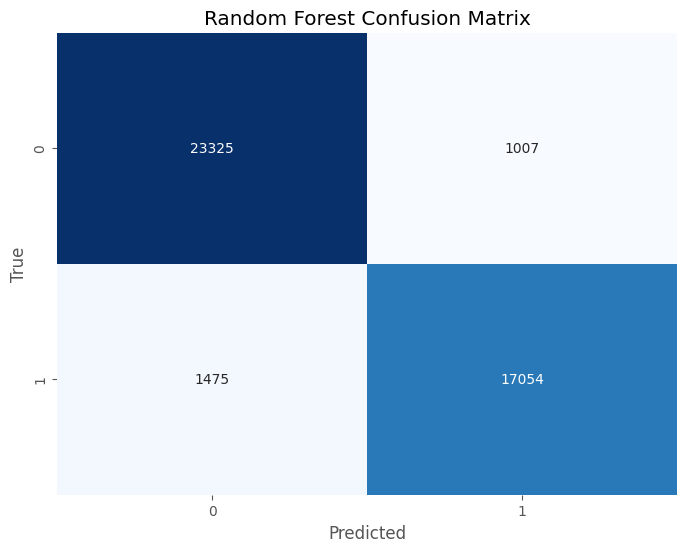

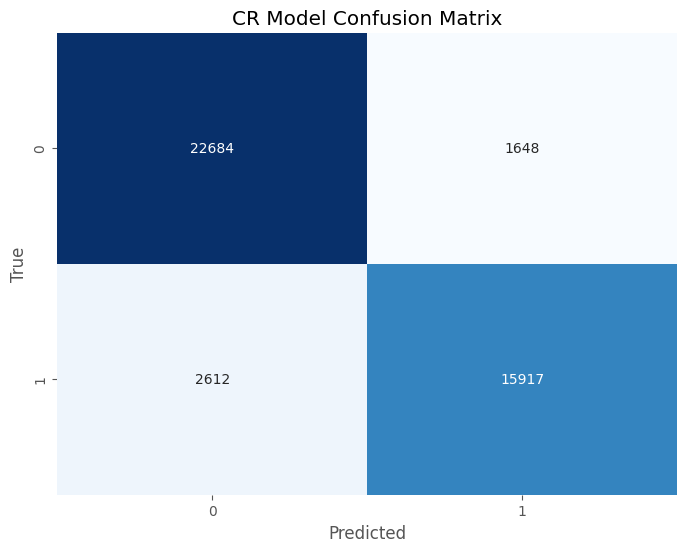

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrices
rf_cm = confusion_matrix(y_test, rf_predictions)
cr_cm = confusion_matrix(y_test, cr_predictions)

# Plot Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



# Plot CR Model Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cr_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("CR Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


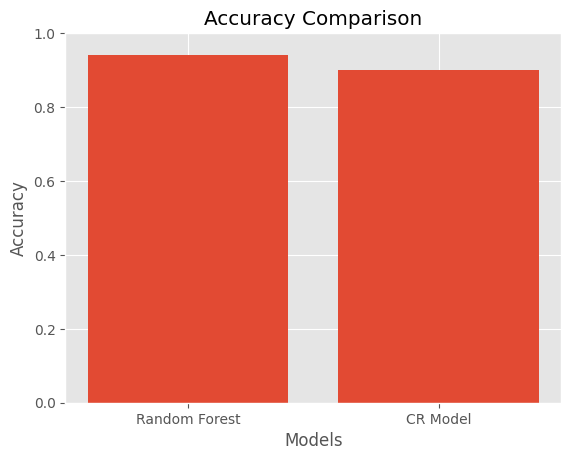

In [51]:
import matplotlib.pyplot as plt

# Calculate accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
cr_accuracy = accuracy_score(y_test, cr_predictions)

# Create a bar plot for accuracy comparison
models = ['Random Forest', 'CR Model']
accuracies = [rf_accuracy, cr_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()


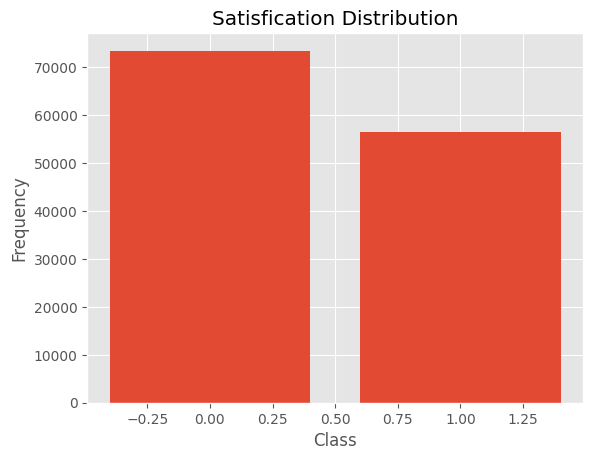

In [52]:
import matplotlib.pyplot as plt
class_counts = Y.value_counts()
class_names = class_counts.index
class_frequencies = class_counts.values

plt.bar(class_names, class_frequencies)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Satisfication Distribution')
plt.show()


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib

# Step 1: Define the SVM classifier
svm = SVC()

# Step 2: Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Step 3: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Step 4: Fit the GridSearchCV object to the training data
grid_search.fit(rfX_train, rfy_train)

# Step 5: Get the best model and its parameters
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Step 6: Export the best SVM model using joblib
joblib.dump(best_svm, 'SVC.pkl')

# Step 7: Load the saved model
loaded_model = joblib.load('SVC.pkl')

# Step 8: Make predictions using the loaded model
y_pred = loaded_model.predict(rfX_test)

NameError: name 'rfy_pred' is not defined

In [55]:
# Step 9: Evaluate the model's performance
accuracy = accuracy_score(rfy_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)
print("Classification Report:")
print(classification_report(rfy_test, y_pred))

Accuracy: 0.9478780243111453
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     24332
           1       0.95      0.92      0.94     18529

    accuracy                           0.95     42861
   macro avg       0.95      0.95      0.95     42861
weighted avg       0.95      0.95      0.95     42861



Accuracy: 0.9478780243111453
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     24332
           1       0.95      0.92      0.94     18529

    accuracy                           0.95     42861
   macro avg       0.95      0.95      0.95     42861
weighted avg       0.95      0.95      0.95     42861



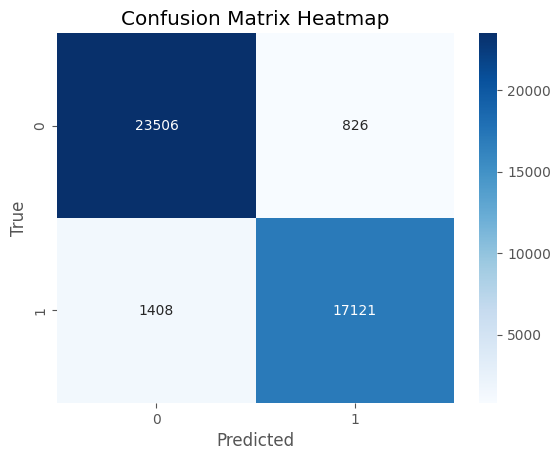

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already imported the necessary libraries and variables

# ... (Code to train the model and find best parameters, etc.) ...

# After obtaining y_pred and rfy_test from the model predictions

# Calculate accuracy
accuracy = accuracy_score(rfy_test, y_pred)

# Display accuracy, best parameters, and classification report
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)
print("Classification Report:")
print(classification_report(rfy_test, y_pred))

# Create a heatmap of the classification report
cm = confusion_matrix(rfy_test, y_pred)
labels = np.unique(rfy_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")

# Save the image
plt.savefig("classification_report_heatmap.png")

# Show the plot (optional, remove if you don't want to display the plot)
plt.show()
